**Features Selections Using Mutual Information**

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectFromModel


In [2]:
data=pd.read_csv("/content/data.csv", delimiter=';')

In [3]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
#seperating the data into dependent and independent variables
X=data.drop(columns= 'Target')
y=data['Target']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Using Mutual Information to rank the importances of each feautures**

In [7]:
mutual_info=  mutual_info_classif(X_train, y_train)
mutual_info


array([0.01097582, 0.05944919, 0.00523746, 0.07621477, 0.00776012,
       0.01812447, 0.03182285, 0.        , 0.00305136, 0.01771759,
       0.04991326, 0.01200581, 0.02395292, 0.01076287, 0.00814248,
       0.03761894, 0.07836101, 0.01209813, 0.05967604, 0.05026554,
       0.        , 0.        , 0.0618486 , 0.07598154, 0.25180536,
       0.18670313, 0.        , 0.00869737, 0.02970128, 0.08715616,
       0.32644563, 0.24957075, 0.01847542, 0.        , 0.0058977 ,
       0.        ])

In [8]:
mutual_info= pd.Series(mutual_info) #Convert the mutual information array into series
mutual_info.index= X_train.columns
mutual_info.sort_values(ascending=False)

Curricular units 2nd sem (approved)               0.326446
Curricular units 1st sem (approved)               0.251805
Curricular units 2nd sem (grade)                  0.249571
Curricular units 1st sem (grade)                  0.186703
Curricular units 2nd sem (evaluations)            0.087156
Tuition fees up to date                           0.078361
Course                                            0.076215
Curricular units 1st sem (evaluations)            0.075982
Curricular units 1st sem (enrolled)               0.061849
Scholarship holder                                0.059676
Application mode                                  0.059449
Age at enrollment                                 0.050266
Mother's occupation                               0.049913
Debtor                                            0.037619
Previous qualification (grade)                    0.031823
Curricular units 2nd sem (enrolled)               0.029701
Admission grade                                   0.0239

The above table is the rank of predictive power(importances) of each feautures using mutual information

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


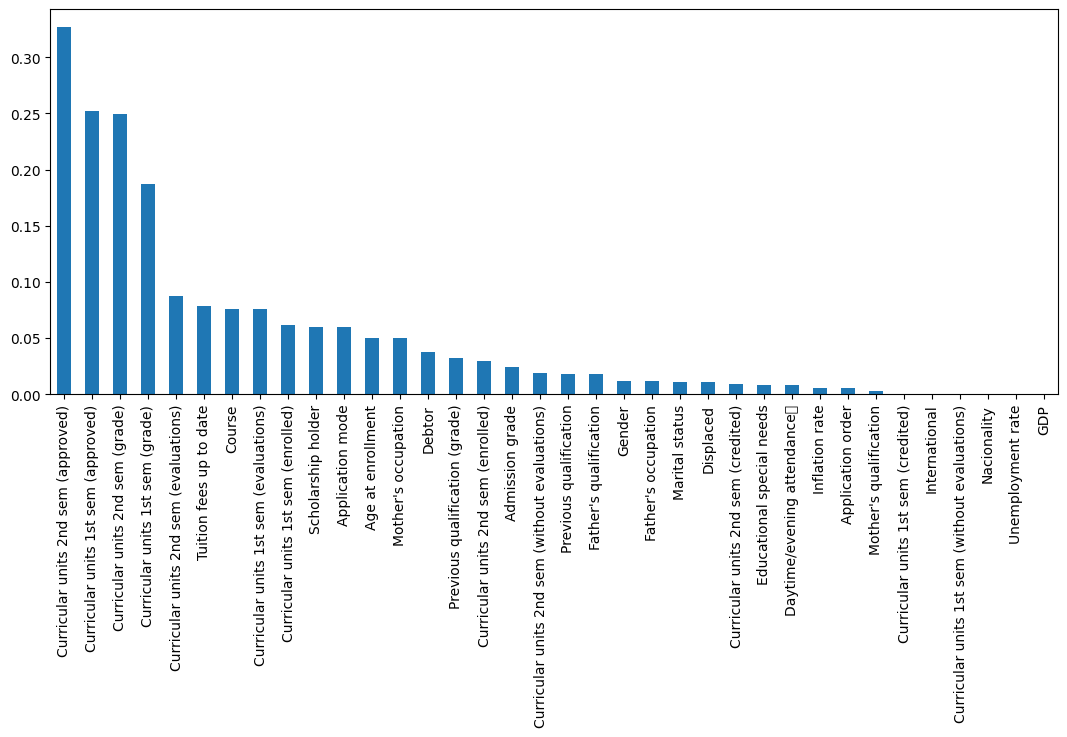

In [9]:
mutual_info.sort_values(ascending=False).plot.bar(figsize= (13,5));

**Using KBest and Mutual information to select the best 10 features**

In [10]:
from sklearn.feature_selection import SelectKBest

In [11]:
Select_ten_columns = SelectKBest(mutual_info_classif, k=10)
Select_ten_columns.fit(X_train, y_train)
X_train.columns[Select_ten_columns.get_support()]

Index(['Course', 'Tuition fees up to date', 'Age at enrollment',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'],
      dtype='object')

**These are the 10th best feautures in the dataset**

['Application mode', 'Course', 'Tuition fees up to date',
       'Age at enrollment', 'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)']